In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='DejaVu Sans')

# Численное решение дифференциальных уравнений

# Part 1

Дифференциальными называются функциональные уравнения (т.е. искомым является функция), содержащие кроме искомой функции также ее производные.
Рассмотрим явное дифференциальное уравнение первого порядка, имеющее общий вид:
$$y'(t)=f(t,y).$$
Например, таковым явлется уравнение $y'(t)=y(t)$, явное решение которого известно: 
$y(t)=c\cdot e^t$, где $c$ - константа интегрирования.
Уже из примера видно, что чтобы получить единственное решение дифференциального уравнения первого порядка, 
нужно зафиксировать начальное условие,
т.е. зафиксировать значение $y(0)$.
Для нетривиальных диф. уравнений аналитическое решение в элементарных
функциях обычно не существует. 
Однако решение можно найти приближенно, воспользовавшись методами
численного интегрирования.
Рассмотрим простейший метод численного интегрирования - [метод Эйлера](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%AD%D0%B9%D0%BB%D0%B5%D1%80%D0%B0).

Решения дифференциального уравнения являются дифференциируемыми функциями, поэтому для них справедливо следующее представление в малой окрестности каждой точки $t$:
$$y(t+\delta)=y(t)+\delta y'(t)+o(\delta),\quad \delta\to0.$$
Отбрасывая бесконечно малое, можно получить приближенную формулу,
по которой можно находить значение в "следующий" момент времени,
зная значение в "предыдущий" момент времени.
При численном решении мы не можем найти решение во все моменты времени,
вместо этого мы вычисляем значения решения в дискретные моменты времени
$t_k$, которые мы считаем упорядоченными $t_k<t_{k+1}$.
В простейшем случае можно считать приращении времени постоянным, тогда
$t_k=t_0+\Delta\cdot k$, где $\Delta$ - шаг времени, а $t_0$ - начальный момент времени.

Зная значение функции и производной в момент времени $t_k$,
можно найти приближенное значение решения в момент времени $t_{k+1}$:
$$y_a(t_{k+1})=y_a(t_k)+(t_{k+1}-t_k)y_a'(t_k).$$
Подставляя значение производной из дифференциального уравнения,
получаем формулу нахождения решения по методу Эйлера:
$$y_a(t_{k+1})=y_a(t_k)+(t_{k+1}-t_k)f(t_k,y_a(t_k)).$$
Найденное таким образом решение $y_a(t)$ не совпадает с точным решением $y(t)$ уравнения.
Если выбрать значение $y_a(t)$ совпадающим с $y(t)$, то 
величина $h(\delta)=y_a(t+\delta)-y(t+\delta)$
характеризует точность одного шага данного метода интегрирования.
Точность методы выражаеют *порядком* метода, 
который выражает скорость уменьшения погрешности с уменьшением шага интегрирования.
Так на одном шаге интегрирования метод имеет порядок $\alpha$,
если $h(\delta)\sim \delta^\alpha$, т.е. $h(\delta)$ пропорционально степени $\alpha$ 
шага интегрирования $\alpha$,
Метод Эйлера имеет второй порядок точности одного шага интегрирования, если
решение достаточно гладкое.

Реализуем метод Эйлера.
Ограничимся только автономными системами, т.е. уравнениями вида
$$y'(t)=f(y(t)),$$
где функция $f$ явным образом не зависит от времени,
а зависит только от $y$.

In [10]:
def EulerIntegrator(h,y0,f):
    """
    Делает один шаг методом Эйлера.
    y0 - начальное значение решения в момент времени t=0,
    h - шаг по времения,
    f(y) - правая часть дифференциального уравнения.
    Возвращает приближенное значение y(h).
    """
    return y0+h*f(y0)

def oneStepErrorPlot(f, y, integrator):
    """Рисует график зависимости погрешности одного шага
    интегрирования от длины шага.
    f(y) - правая часть дифференциального уравнения,
    y(t) - точное решение,
    integrator(h,y0,f) - аргументы аналогичны EulerIntegrator.
    """
    eps=np.finfo(float).eps
    steps=np.logspace(-10,0,50) # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=[y(t) for t in steps] # точные значения решения
    yApproximate=[integrator(t,y0,f) for t in steps] # приближенные решения
    h=[np.maximum(np.max(np.abs(yp-ya)),eps) for yp, ya in zip(yPrecise, yApproximate)]
    plt.loglog(steps, h, '-')
    plt.xlabel(u"Шаг интегрирования")
    plt.ylabel(u"Погрешность одного шага") 
    
def firstOrderPlot():
    """Рисует на текущем графике прямую y=x."""
    ax = plt.gca()
    steps=np.asarray(ax.get_xlim())
    plt.loglog(steps, steps, '--r')

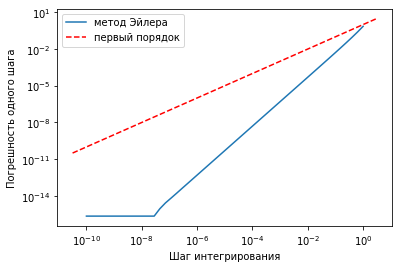

In [11]:
# Тестовая система.
# Правая часть уравнения y'=f(y).
f=lambda y: y
# Аналитическое решение
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"первый порядок"],loc=2)
plt.show()

На практике величина шага интегрирования $\Delta$ является вспомогательной величиной,
изменение которой позволяет контролировать точность нахождения результата.
Интересуют же нас обычно значения функции на неком интервале $t\in[t_0,t_0+T]$.
Если мы используем равномерные приращения по времени $\Delta$, 
т.е. $t_k=t_0+k\cdot\Delta$, то для достижения правого конца $t_0+T$ интервала 
потребуется $N$ шагов длины $T/N$.
Каждый шаг интегрирования добавляет погрешность, а количество шагов растет
с уменьшением длины шага, поэтому можно ожидать, что точность нахождения 
численным методом решения уравнения на интервале отличается от точности 
одного шага интегрирования.
Пусть $y_a$ приближенное решение уравнения, полученное интегрированием с шагом $\delta$,
а $y$ - точное решение уравнения, тогда величину 
$H(\delta)=y_a(t_0+T)-y(t_0+T)$ будем называть погрешностью интегрирования на интервале.
Вычислим эту погрешность для метода Эйлера.

In [12]:
def integrate(N, delta, f, y0, integrator):
    """
    Делает N шагов длины delta метода integrator для уравнения y'=f(y) с начальными условиями y0.
    Возвращает значение решения в конце интервала.
    """
    for n in range(N):
        y0=integrator(delta, y0, f)
    return y0

def intervalErrorPlot(f, y, integrator, T=1, maxNumberOfSteps=1000, numberOfPointsOnPlot=16):
    """
    Рисует график зависимости погрешности интегрирования на интервале
    от длины шага интегрирвания.
    Аргументы повторяют аргументы oneStepErrorPlot.
    """
    eps=np.finfo(float).eps
    numberOfSteps=np.logspace(0,np.log10(maxNumberOfSteps),numberOfPointsOnPlot).astype(np.int)
    steps=T/numberOfSteps # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=y(T) # точнре значения решения на правом конце
    yApproximate=[integrate(N,T/N,f,y0,integrator) for N in numberOfSteps] # приближенные решения
    h=[np.maximum(np.max(np.abs(yPrecise-ya)),eps) for ya in yApproximate]
    plt.loglog(steps, h, '.-')
    plt.xlabel("Шаг интегрирования")
    plt.ylabel("Погрешность интегрования на интервале")

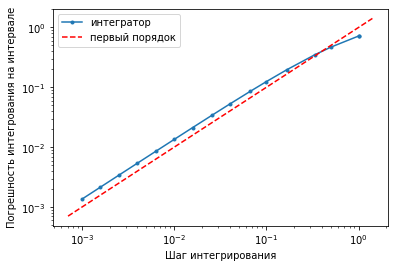

In [13]:
# Строим график ошибок
intervalErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend(["интегратор","первый порядок"],loc=2)
plt.show()

Как мы видим, на интервале метод Эйлера имеет первый порядок точности.
Существует однако ситуация, когда метод Эйлера дает точный ответ:
это происходит, когда производная постоянна.

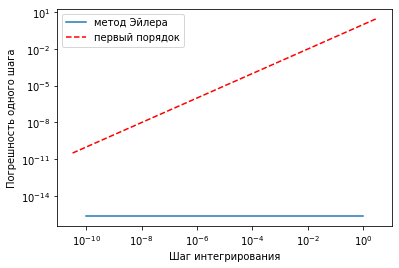

In [14]:
f=lambda y: 1
yExact=lambda t: t

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"первый порядок"],loc=2)
plt.show()

При приращении аргумента на некий шаг метод Эйлера приращает значение решения таким оразом, 
что производная остается постоянной и равной значению производной в начале шага.
Однако это вообще говоря очень грубое допущение. 
Чтобы получить более точный метод, мы можем ввести поправки на изменении производной.
Раскладывая решение по формуле Тейлора, получаем при малых $t$:
$$y(t)=y(0)+y'(0)t+y''(0)\frac{t^2}2+o(t^2).$$
Так $y'(t)=f(t,y(t))$, то дифференцируя по $t$, получаем:
$$y''(t)=\frac{\partial}{\partial t}f(t,y(t))+y'(t)\frac{\partial}{\partial y}f(t,y(t)).$$
Подставляя производные в разложение, получаем:
$$y(\delta)=y(0)+f(0,y(0))\delta+\left(\frac{\partial}{\partial t}f(0,y(0))
+f(0,y(0))\frac{\partial}{\partial y}f(0,y(0))\right)\frac{\delta^2}2+o(\delta^2).$$
Эта формула обновления позволяет получить решение в точке $t=\delta$, зная решение в точке $t=0$,
с погрешностью меньшей $\delta^2$. 
Это означает, что уменьшая шаг интегрирования в два раза, мы получаем точность выше более чем в 4 раза.
Тот же результат можно было получить, используя формулу Эйлера с шагом $\delta/4$.

In [15]:
def NewtonIntegrator(h,y0,f):
    """
    Делает один шаг методом Эйлера.
    y0 - начальное значение решения в момент времени t=0,
    h - шаг по времения,
    f(y) - правая часть дифференциального уравнения и его производная.
    Возвращает приближенное значение y(h).
    """
    return y0+h*f[0](y0)+f[0](y0)*f[1](y0)*h*h/2

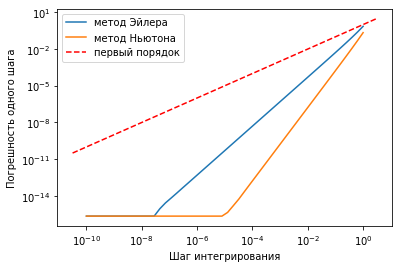

In [16]:
f=(lambda y: y, lambda y: 1)
# Аналитическое решение
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, NewtonIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"метод Ньютона",u"первый порядок"],loc=2)
plt.show()

Разложение решения по формуле Тейлора и подстановка производных из дифференциального уравнения 
позволяет получить формулу интегрирования по методу Ньютона произвольной точности.
Однако вычисления по этой формуле требуют вычисления производных правой части 
дифференциального уравнения, что может быть сложной аналитической и вычислительной задачей.
Существует другой способ получить метод такой же точности, но не требующий вычислять
производные правой части.
Рассмотрим сначала модифицированный метод Эйлера.

Модифицированный метод Эйлера вычисляет значение решения $y(\delta)$ по данному значению $y(0)$ с помощью следующей формулы:
$$y(\delta)=y(0)+f\left(\frac{\delta}{2},y_{\frac{\delta}{2}}\right)\delta,$$
где $y_{\frac\delta2}$ - значение решение на половинном шаге $t=\delta/2$:
$$y_{\frac\delta2}=y(0)+f(0,y(0))\frac\delta2.$$
Т.е. значение производной на всем шаге считается постоянным, однако для более точной оценки
производной сначала находится приближенное значение решения на половине шага интегрирования,
которое и используется для вычисления производной из дифферецниального уравнения.

In [17]:
def ModifiedEulerIntegrator(h,y0,f):
    """
    Модифицированный метод Эйлера. 
    Аргументы аналогичны EulerIntegrator.
    """
    yIntermediate=y0+f(y0)*h/2
    return y0+h*f(yIntermediate)

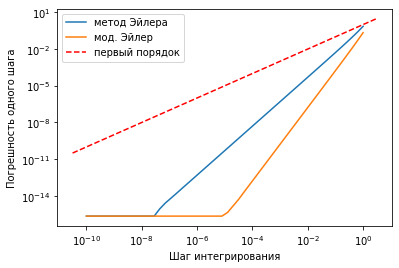

In [18]:
f=lambda y: y
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, ModifiedEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"мод. Эйлер",u"первый порядок"],loc=2)
plt.show()

Чтобы получить точность выше, мы должны найти больше промежуточных значений внутри одного шага интегрирования
и использовать эти значения для оценки производных высоких порядков.
Полученные таким образом методы относятся к семейству методов [Рунге-Кутты](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B).
Самой известным методом из этого классая является классический метод Рунге-Кутты четвертого порядка, использующий для вычислений четыре спомогательные точки. 
Соответствующая формула интегрирования 
для решения задачи
$$y'(t)=f(t,y(t)),\quad y(0)=y_0,$$
имеет вид:
$$y(\delta)=y(0)+\frac\delta6(k_1+2k_2+2k_3+k_4),$$
$$k_1=f(0,y(0)),$$
$$k_2=f\left(\frac\delta2,y(0)+\frac\delta2k_1\right),$$
$$k_3=f\left(\frac\delta2,y(0)+\frac\delta2k_2\right),$$
$$k_4=f\left(\delta,y(0)+\delta k_3\right).$$
Классический метод Рунге-Кутты удобен тем, что промежуточные шаги интегрирования делаются последовательно,
причем в памяти достаточно хранить только значение одного промежуточного шага.
Существуют однако более точные и более устойчивые варианты методы Рунге-Кутты.

In [19]:
def RungeKuttaIntegrator(h,y0,f):
    """
    Классический метод Рунге-Кутты четвертого порядка. 
    Аргументы аналогичны EulerIntegrator.
    """
    k1=f(y0)
    k2=f(y0+k1*h/2)
    k3=f(y0+k2*h/2)
    k4=f(y0+k3*h)
    return y0+(k1+2*k2+2*k3+k4)*h/6

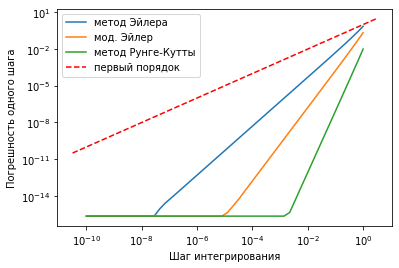

In [20]:
f=lambda y: y
yExact=lambda t: np.exp(t)

# Строим график ошибок
oneStepErrorPlot(f, yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, ModifiedEulerIntegrator)
oneStepErrorPlot(f, yExact, RungeKuttaIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"мод. Эйлер",u"метод Рунге-Кутты",u"первый порядок"],loc=2)
plt.show()

Рассмотренные выше методы относились к семейству явных методов, т.е. 
позволяли сразу вычислить значения решения по вышеприведенным формулам,
так как все величины в формулах были известны заранее.
Однако формулы интегрирования могут содержать искомое решение и в левой и правой частях,
тогда метод называют неявным.
Например, формулу интегрирования для методы Эйлера:
$$y(\delta)=y(0)+f(0,y(0))\delta,$$
можно было переписать так
$$y(\delta)=y(0)+f(\delta,y(\delta))\delta,$$
т.е. для приближения производной решения на шаге интегрирования используется точное значение производной в конце, а не в начале шага.
Для нахождения нового значения решения $y(\delta)$ в неявной схеме требуется решить уравнение
$G(y(\delta))=0$, где $G(v)=y(0)-v+f(\delta,v)\delta$. 
Неявные методы вычислительно сложнее, чем явные,
однако неявные методы часто обладают привлекательными свойствами, такими как устойчивость и сохранение первых интегралов, что объясняет популяроность и важность этих методов.

Мы рализуем [неявный метод Эйлера](https://en.wikipedia.org/wiki/Backward_Euler_method), 
используя для решения уравнения [метод Ньютона]((https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0)
в реализации SciPy [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton).

In [21]:
import scipy.optimize
def BackwardEulerIntegrator(h,y0,f):
    """
    Неявный метод Эйлера. 
    Аргументы аналогичны NewtonIntegrator.
    """
    def G(v): return y0-v+h*f[0](v) 
    def Gprime(v): return h*f[1](v)-np.ones(v.shape) # Производная функции G
    return scipy.optimize.newton(G,y0,fprime=Gprime) # Запускаем итерации метода Ньютона, используя y0 в качестве первого приближения.

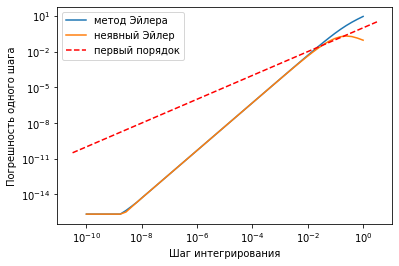

In [22]:
alpha=-10
f=(lambda y: alpha*y, lambda y: alpha)
yExact=lambda t: np.exp(alpha*t)

# Строим график ошибок
oneStepErrorPlot(f[0], yExact, EulerIntegrator)
oneStepErrorPlot(f, yExact, BackwardEulerIntegrator)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"неявный Эйлер",u"первый порядок"],loc=2)
plt.show()

Мы видим, что и явный, и неявный метод Эйлера имеют один порядок,
однако неявный метод более устойчив, косвенно это проявляется в меньшей ошибке на больших шагах интегрирования.
При выполнении многих шагов неустойчивость метода приводит к катастрофическому росту погрешности,
что мы видим при больший шагах не следующем графике, демонстрирующем ошибку на фиксированном интервале при разных шагах интегрирования.

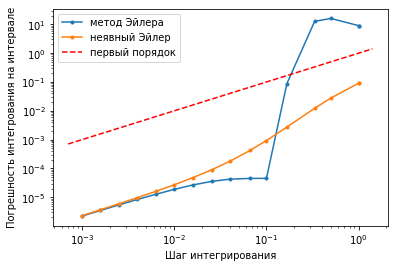

In [23]:
intervalErrorPlot(f[0], yExact, EulerIntegrator,numberOfPointsOnPlot=16)
intervalErrorPlot(f, yExact, BackwardEulerIntegrator,numberOfPointsOnPlot=16)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"неявный Эйлер",u"первый порядок"],loc=2)
plt.show()

Вышепроведенные численные эксперименты подсказывают нам зависимость ошибки приближенного решения ОДУ от величины шага интегрирования, теория дает нам асимптотику ошибки для одного шага
$$
y_0(t_0+\delta)-y(t_0+\delta)=C_1\cdot \delta^{D+1},\quad \delta\to 0,
$$
и для интервала фиксированой длины:
$$
y_0(t_0+T)-y(t_0+T)=C_2\cdot \delta^{D},\quad \delta\to 0,
$$
где $y_0(t)$ и $y(t)$ аналитическое и численное решения ОДУ, соответственно, удовлетворяющие одинаковым начальным условиям $y_0(t_0)=y(t_0)$, 
а степень $D$ определяет порядок метода.
Так как величина шага типично мала, то $\delta<1$ и методы высокого порядка дают меньшие погрешности.
Эти асимптотики однако не учитывает численных погрешностей, поэтому на практике они работают только для шагов больше некоторого порогового значения. 
Методы высокого порядка обычно требуют большего объема вычислений, поэтому численные погрешности для них также больше, поэтому для неразумно маленьких шагов ошибка методов высокого порядка может оказываться даже хуже, чем у метода низкого порядка.

# Задания

1. Объясните, что понимается под порядком метода интегрирования? Как порядок метода можно определить на графике зависимости точности решения от шага интегрирования? Какой порядок имеют рассмотренные выше методы? Как связаны ошибки интегрирования на одном шаге и на интервале?
1. Сравните объемы вычислений (выраженые в числе вычислений правой части ОДУ и ее производной) разных методов, необходимые для получения одной и той же точности решения ОДУ на интервале (размер шага у разных методов будет разным).
1. Почему метод Рунге-Кутты 4 порядка с шагом $\delta$ выгоднее использовать, чем метод Эйлера с шагом $\delta/4$, хотя метод Рунге-Кутты потребует несколько большего объема вычислений, а уменьшение шага в Эйлере очевидно уменьшает погрешность?
1. Сравните поведение численных методов на разных шагах до $\delta\approx 10^{-16}$. Какие рекомендация по выбору шага интегрирования для методов разных порядков вы дадите, учитывая накопление численных ошибок?

## Task 1

#### a) Объясните, что понимается под порядком метода интегрирования?

Пусть $y_0(t)$ - аналитическое решение, $y(t)$ - точное решение. Тогда асимптотика для ошибки одного шага $\delta$ будет иметь вид

$$y_0(t + \delta) - y(t + \delta) = C_1 \cdot \delta^{D + 1}$$

Асимптотика ошибки на интервале $[t; t + T]$ будет иметь вид

$$y_0(t + T) - y(t + T) = C_2 \cdot \delta^{D}$$

$D$ - порядок метода интегрирования

#### b) Как порядок метода можно определить на графике зависимости точности решения от шага интегрирования?

График зависимости ошибки одного шага рассмтариваемого метода от размера шага интегрирования в логарифмическом масштабе является линейным. Можно записать следующее

$$ln(y_0(t + \delta) - y(t + \delta)) = k \cdot ln(\delta) + b = ln(x^k \cdot e^b) \Longrightarrow y_0(t + \delta) - y(t + \delta) = C \cdot x^k = C \cdot x^{D + 1}$$

Отсюда можно сделать вывод, что угловой коэффициент графика зависимости ошибки рассматриваемого метода от размера шага интегрирования в логарифмическом масштабе будет на единицу больше порядка метода

$$k = D + 1$$

#### c) Какой порядок имеют рассмотренные выше методы?

Метод Эйлера и модифицированный метод Эйлера имеют 1 порядок точности, метод Ньютона имеют 2 порядок точности, метод Рунге-Кутта, рассмотренный выше, имеет 4 порядок точности

#### d) Как связаны ошибки интегрирования на одном шаге и на интервале?

В общем случае ошибка на интервале и ошибка на одном шаге не связаны

## Task 2

#### Сравните объемы вычислений (выраженые в числе вычислений правой части ОДУ и ее производной) разных методов, необходимые для получения одной и той же точности решения ОДУ на интервале (размер шага у разных методов будет разным)

Рассматриваем решение уравнения вида $y'(t) = f(y(t))$ на отрезке $[t, t + T]$, $y(t) = y_0$ - известное значение, $\varepsilon$ - необходимая точность вычислений

##### Метод Эйлера

$$y(t) = y_0$$

$$y_1 = y_0 + h \cdot f(y_0)$$

$$y_2 = y_1 + h \cdot f(y_1)$$

$$...$$

$$y(t + T) = y_N = y_{N-1} + h \cdot f(y_{N-1})$$

Чтобы перейти от $i$-ой точки к $(i+1)$-ой, необходимо произвести 1 вычисление правой части. Всего имеем $N$ точек, в которых необходимо произвести вычисление.

<!-- $$y_0(t + T) - y(t + T) = C \cdot h < \varepsilon$$ 
$$C \frac{T}{N} < \varepsilon$$
$$N_{Euler} \sim \Big[ \frac{T}{\varepsilon}\Big]$$ -->

Объем вычислений для метода Эйлера будет равен количеству узлов

$$\text{Объем вычислений} = N_{Euler}$$

##### Метод Ньютона

В общем случае решение методом Ньютона имеет следующий вид

$$y(\delta)=y(0)+f(0,y(0))\delta+\left(\frac{\partial}{\partial t}f(0,y(0))
+f(0,y(0))\frac{\partial}{\partial y}f(0,y(0))\right)\frac{\delta^2}2+o(\delta^2)$$

Мы рассматриваем автономные системы, поэтому $\frac{\partial}{\partial t}f(0,y(0)) = 0$

$$y(\delta)=y(0)+f(0,y(0))\delta+\left(f(0,y(0))\frac{\partial}{\partial y}f(0,y(0))\right)\frac{\delta^2}2+o(\delta^2)$$

Отсюда можно сделать вывод, что при переходе от $i$-ой точки $(i+1)$-ой точке, производится два вычислений правой части и одно вычисление ее производной

Объем вычислений для метода Ньютона будет равен утроенному количеству узлов

$$\text{Объем вычислений} = 3 N_{Newton}$$

##### Модифицированный метод Эйлера

$$y(t) = y_0$$

$$y_{\frac{1}{2}} = y_0 + \frac{h}{2} \cdot f(y_0)$$

$$y_1 = y_0 + h \cdot f\Big(y_{\frac{1}{2}}\Big)$$

$$...$$

$$y_{i + \frac{1}{2}} = y_i + \frac{h}{2} \cdot f(y_i)$$

$$y_{i+1} = y_i + h \cdot f\Big(y_{i + \frac{1}{2}}\Big)$$

$$...$$

$$y_{N - \frac{1}{2}} = y_{N-1} + \frac{h}{2} \cdot f(y_{N-1})$$

$$y(t + T) = y_N = y_{N-1} + h \cdot f\Big(y_{N-\frac{1}{2}}\Big)$$

Чтобы перейти от $i$-ой точки к $(i+1)$-ой, необходимо произвести 2 вычисления правой части. Всего имеем $N$ точек, в которых необходимо произвести вычисление.

<!-- $$y_0(t + T) - y(t + T) = C \cdot h^2 < \varepsilon$$ 
$$C \frac{T^2}{N^2} < \varepsilon$$
$$N_{mod Euler} \sim \Big[ \frac{T}{\sqrt{\varepsilon}}\Big]$$ -->

Объем вычислений для модифицированного метода Эйлера будет равен удвоенному количеству узлов

$$\text{Объем вычислений} = 2  N_{mod Euler}$$

##### Метод Рунге-Кутты 4-го порядка

Аналогичным образом можно получить 

$$\text{Объем вычислений} = 4  N_{RungeKutta}$$



In [24]:
epsilon = 1e-3
interval = 1

def count_intervals(f, y, integrator, T=interval):

    yPrecise=y(T)
    n = 1
    delta = T / n
    y0=y(0) # Начальное значение
    y_T = integrate(n, delta, f, y0, integrator) # Значение на конце интервала
    error_interval = np.abs(yPrecise - y_T)
    
    while error_interval >= epsilon:
        n += 1
        delta = T / n
        y_T = integrate(n, delta, f, y0, integrator)
        error_interval = np.abs(yPrecise - y_T)

    return n


alpha = -1
f=(lambda y: alpha*y, lambda y: alpha)
yExact=lambda t: np.exp(alpha*t)

N_Euler  = count_intervals(f[0], yExact, EulerIntegrator)
N_Newton = count_intervals(f, yExact, NewtonIntegrator)
N_ModEuler = count_intervals(f[0], yExact, ModifiedEulerIntegrator)
N_RungeKutta = count_intervals(f[0], yExact, RungeKuttaIntegrator)

print("Метод Эйлера \t Число Интервалов: {} \t Длина интервала: {:.10f} \t Число операций: {}".format(
            N_Euler, interval / N_Euler, N_Euler))
print("Метод Ньютона \t Число Интервалов: {} \t Длина интервала: {:.10f} \t Число операций: {}".format(
            N_Newton, interval / N_Newton, N_Newton * 3))
print("Модиф. Эйлер \t Число Интервалов: {} \t Длина интервала: {:.10f} \t Число операций: {}".format(
            N_ModEuler, interval / N_ModEuler, N_ModEuler * 2))
print("Метод Рунге-Кутты \t Число Интервалов: {} \t Длина интервала: {:.10f} \t Число операций: {}".format(
            N_RungeKutta, interval / N_RungeKutta, N_RungeKutta * 4))


Метод Эйлера 	 Число Интервалов: 185 	 Длина интервала: 0.0054054054 	 Число операций: 185
Метод Ньютона 	 Число Интервалов: 9 	 Длина интервала: 0.1111111111 	 Число операций: 27
Модиф. Эйлер 	 Число Интервалов: 9 	 Длина интервала: 0.1111111111 	 Число операций: 18
Метод Рунге-Кутты 	 Число Интервалов: 2 	 Длина интервала: 0.5000000000 	 Число операций: 8


## Task 3

#### Почему метод Рунге-Кутты 4 порядка с шагом  𝛿 выгоднее использовать, чем метод Эйлера с шагом  𝛿/4, хотя метод Рунге-Кутты потребует несколько большего объема вычислений, а уменьшение шага в Эйлере очевидно уменьшает погрешность?

При размере шага $\delta$ метод Эйлера дает погрешность $O(\frac{\delta}{4})$ на достаточно гладких функциях при объеме вычислений $\frac{4T}{\delta}$, а метод Рунге-Кутты 4 порядка дает погрешность $O(\delta^4)$ при объеме вычислений $\frac{4T}{\delta}$. Но, как можно видеть из предыдущего пункта, при необходимой точности $\varepsilon = 10^{-3}$ для метода Рунге-Кутты требуется размер шага в $10^2$ больший, чем для метода Эйлера.

## Task 4

#### Сравните поведение численных методов на разных шагах до $\delta\approx 10^{-16}$. Какие рекомендация по выбору шага интегрирования для методов разных порядков вы дадите, учитывая накопление численных ошибок?

In [25]:
def MyOneStepErrorPlot(f, y, integrator, step_min, step_max):
    """Рисует график зависимости погрешности одного шага
    интегрирования от длины шага.
    f(y) - правая часть дифференциального уравнения,
    y(t) - точное решение,
    integrator(h,y0,f) - аргументы аналогичны EulerIntegrator.
    """
    eps=np.finfo(float).eps
    steps=np.logspace(step_min,step_max,50) # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=[y(t) for t in steps] # точные значения решения
    yApproximate=[integrator(t,y0,f) for t in steps] # приближенные решения
    h=[np.maximum(np.max(np.abs(yp-ya)),eps) for yp, ya in zip(yPrecise, yApproximate)]
    plt.loglog(steps, h, '-')
    plt.xlabel(u"Шаг интегрирования")
    plt.ylabel(u"Погрешность одного шага") 

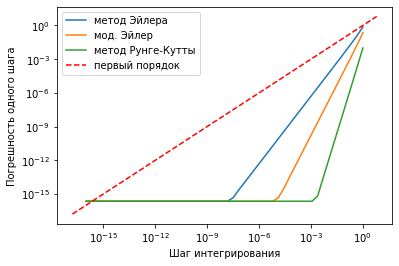

In [26]:
f=lambda y: y
yExact=lambda t: np.exp(t)

# Строим график ошибок
MyOneStepErrorPlot(f, yExact, EulerIntegrator, -16, 0)
MyOneStepErrorPlot(f, yExact, ModifiedEulerIntegrator, -16, 0)
MyOneStepErrorPlot(f, yExact, RungeKuttaIntegrator, -16, 0)
firstOrderPlot()
plt.legend([u"метод Эйлера",u"мод. Эйлер",u"метод Рунге-Кутты",u"первый порядок"],loc=2)
plt.show()

Из графика видим, что максимально возможная точность для разных методов достигается на разной длине шага. Если нужна очень высокая точность, то лучше пользоваться методами более высоких порядков. Например, для метода Рунге-Кутты максимальная точность достигается при длине шага $10^{-3}$, а для метода Эйлера максимальная точность будет достигаться при длине шага $10^{-8}$, но в таком случае необходимо будет производить слишком много вычислений. Но метод Эйлера предпочтительнее будет использовать, если нужно решить уравнение численно на большом интервале и при этом не требуется максимальная точность.

# Part 2

Поведение численного решения на фиксированном интервале не полностью описывает характеристики численного интегратора.
Часто промежуток интегрирования формально бесконечен, например, если мы моделируем динамику системы, то нас интересует решение во все времена $t\geq t_0$. Сравним решение методом Эйлера для разных шагов с аналитическим решением на большом промежутке.


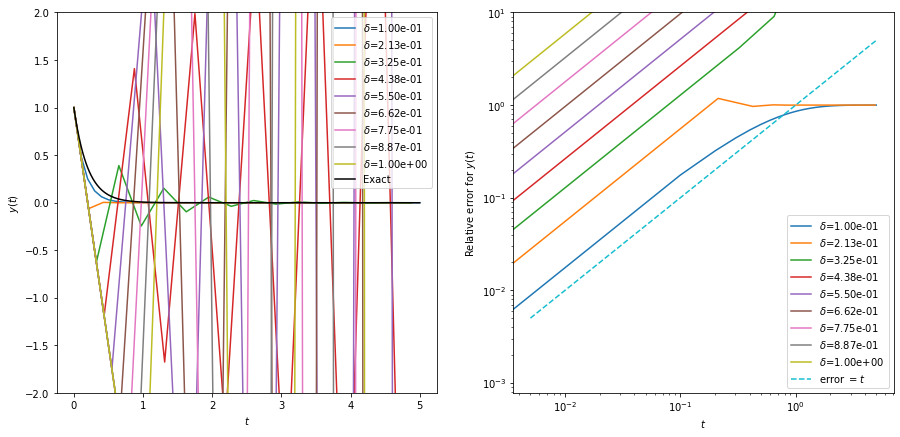

In [27]:
def solve_ode(T=None, delta=None, f=None, y0=None, integrator=None):
    """
    Решает уравнение y'(t)=f(y(t)) с начальными условиями y(0)=y0 на интервале [0,T],
    используя интегратор `integrator` и шаг интегрирования delta.
    Возвращает пару массивов (tk, yk), где tk хранит отсчеты времени, а yk значения решения в эти отсчеты.
    """
    y0 = np.asarray(y0)
    N = int(T/delta) # Число шаго интегрирования
    tk = np.arange(N+1)*delta
    yk = np.empty((N+1,)+y0.shape, dtype=np.complex) # Массивы для хранения решения.
    yk[0]=y0 # Начальные условия
    for n in range(N): # Итерируем решатель
        yk[n+1]=integrator(delta, yk[n], f)
    return tk, yk

def run_test(integrator=None, yExact=None, deltas=None, **problem):
    # Готовим место под рисунки
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))

    # Проводим эксперименты.
    for delta in deltas:
        tk, yk = solve_ode(delta=delta, integrator=integrator, **problem) 
        y0 = yExact(tk)
        error = np.abs(yk-y0)/np.abs(y0)
        label = "$\delta$={:.2e}".format(delta)
        ax1.plot(tk, np.real(yk), label=label)
        ax2.loglog(tk, error, label=label)
    tk = np.linspace(0, problem["T"], 1000)
    y0 = yExact(tk)
    ax1.plot(tk, np.real(y0), '-k', label='Exact')
    ax2.loglog(tk[1:], tk[1:], '--', label="error $=t$")
    mx = np.max(np.real(y0))
    ax1.set_ylim(( -2*mx, 2*mx ))
    ax2.set_ylim((None,1e1))
    ax1.legend(); ax2.legend()
    ax1.set_xlabel("$t$")
    ax1.set_ylabel("$y(t)$")    
    ax2.set_xlabel("$t$")
    ax2.set_ylabel("Relative error for $y(t)$")        
    plt.show()

alpha = -5+0j # Коэффициент в решаемом уравнении y'(t)=alpha*y(t).
problem = {
    "T": 5, # Промежуток интегрирования
    "f": lambda y: alpha*y, 
    "yExact": lambda t: np.exp(alpha*t),
    "deltas": np.linspace(0.1,1.0,9), # Набор шагов интегрирования, на которых производится сравнение.
    "y0": 1, # Начальное условие.
}

run_test(integrator=EulerIntegrator, **problem)

Видно, что погрешность растет со временем при любых шагах интегрирования, причем погрешность пропорциональна $t$ или, что эквивалентно, номеру шага.
Мы рассматривали очень большие значения шага, поэтому ошибки приближаются к 100%. 
Несмотря на большую погрешность, при маленьких величинах шага численное решение качественно воспроизводит аналитическое, 
также стремиться к нулю, а значит и абсолютная погрешность такого решения стремиться к нулю.
При значениях шага больших критического значения численное решение становится неограниченным и не дает нам никакой информации об аналитическом решении. 
Говорят, что метод при больших шагах неустойчив.

Чтобы понять причину неустойчивости, рассмотрим изменение ошибка от шага к шагу.
Обозначим через $y=y_0(t; \hat t, \hat y)$ решение уравнения $y'(t)=\alpha y(t)$, 
удовлетворяющее начальным условиям $y(\hat t)=\hat y$.
Пусть первоначальная ошибка в начальных условиях была равна $\Delta y_0=y_0-y(0; 0, y_0)$.
Погрешность после одного шага мы оценивали выше, его асимптотика определяет порядок метода:
$\Delta y_1=y_1-y(\delta; 0, y_0)\approx C_1\delta^{D+1}$.
Предположим, что при $t\geq \delta$ мы найдем решение чудо методом, дающим абсолютно точное решение $y(t;\delta,\hat y_1)$.
К сожалению, это решение не даст точного решения исходной задачи, 
так как в начальных условиях уже содержится ошибка,
т.е. как минимум, мы получаем погрешность $y(t;0,y_0)-y(t;\delta,y_1)$.
Заметим, что эта погрешность будет расти экспоненциально, если $\mathrm{Re}\alpha>0$.
Для нашего простого уравнения $y(t;\hat t,\hat y)=\hat y e^{\alpha(t-\hat t)}$, а значит
$$
y(t;0,y_0)-y(t;\delta,y_1)=y_0e^{\alpha t}-y_1 e^{\alpha(t-\delta)}
=y_0e^{\alpha t}-(y(\delta;0,y_0)+\Delta y_1)e^{\alpha(t-\delta)}
=-e^{\alpha(t-\delta)}\Delta y_1.
$$
Таким образом, при переходе к следующему узлу времени, ошибка $\Delta y_1$ на предыдущем шаге
преобразуется в ошибку $\Delta y_2\geq \beta \Delta y_1$ на следующем шаге, где $\beta=e^{\alpha\delta}$.
Так как шаг делается также приближенным методом, то фактическая ошибка будет включать в себя также ошибку одного шага:
$$
\Delta y_{k+1}\approx \beta\Delta y_k+C_1\delta^{D+1}.
$$
Если $|\beta|>1$, то ошибки с каждым следующим шагом раздуваются,
если $|\beta|<1$, то скорость накопления ошибки намного меньше. 

Проиллюстрируем поведения ошибки решением уравнения $y'=5y$. 
Черная сплошная линия показывает численное решение, полученное явным методом Эйлера с шагом $\delta=0.1$.
Пунктирным линиями обозначены точные решения, совпадающие с численным решением в точках $(k\delta,y_k)$.
Верхняя линия сооветствует точному решению с искомыми начальными условиями.
После первого шага интегрирования решение получается несколько меньшим, чем точное значение.
Через эту приближенную точку мы провели второю интегральную кривую, вторую сверху на рисунке.
Расстояние между двумя верхними кривыми показывает, как ошибка первого шага интегрирования меняется со временем:
на первом шаге ее не видно, но она быстро растет.
Окончательная ошибка равна расстоянию от верхней кривой (точное решение), до черной кривой (численное решение),
эта погрешность растет экспоненциально.

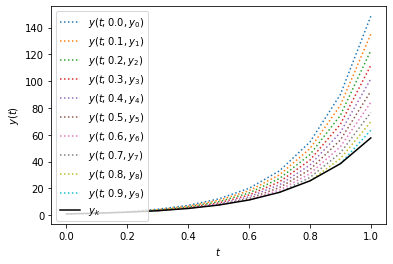

In [28]:
alpha=5 # Собственное число диф. оператора.
f=lambda y: alpha*y #  # Правая часть ОДУ.
y=lambda t, hatt, haty: haty*np.exp(alpha*(t-hatt)) # Аналитическое решение.
T = 1 # Максимальное значение времени.
tk=np.linspace(0, T, 11) # Отсчеты времени для численного интегрирования.
yk=np.empty_like(tk) # Приближенное решение.
yk[0]=1 # Начальное условие.
for n in range(len(tk)-1): # Перебираем отсчеты времени.
    plt.plot(tk[n:], y(tk[n:],tk[n],yk[n]), ':', label="$y(t;{:.1f},y_{:})$".format(tk[n], n))
    yk[n+1] = yk[n] + (tk[n+1]-tk[n])*f(yk[n])
plt.plot(tk, yk, '-k', label="$y_k$")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.show()


Мы вывели константу обусловленности $\beta$ из анализа поведения аналитического решения.
Для расходящихся интегральных кривых ошибка нарастает неизбежно, независимо от используемого метода.
Однако на практике часто расмматриваются случаи, когда объем фазового пространства в исходной задаче сохраняется,
что соответствует $|\beta|=1$, однако соответствующее число обусловленности численного метода может быть больше $1$.
Если численный метод записать в виде линейного преобразования $y_{k+1}=Iy_k$, 
то ошибка $\Delta y_k$ предыдущего шага пересчитывается на следующий как $I\Delta_k$.
Значит число обусловленности шага интегрирования можно оценить как $\beta=\|I\|$.
Эта $\beta$ зависит от выбора метода и от шага интегрирования. 
При $|\beta|<1$ ошибка растет умеренно (линейно) и метод интегрирования является устойчивым.

Существует несколько формальных определений устойчивости. 
Рассмотрим два из них, опирающиеся на поведение численных решений уравнения $y'=\alpha y$ с начальным условием $y(0)=1$.
Если численные решения стремяться к нулю $y(t)\to0$ при $t\to+\infty$ для всех $\mathrm{Re}\,\alpha<0$, 
то метод по определению называется *$A$-устойчивым*.
Для методов семейства Рунге-Кутты оператор $I\colon y_{k+1}=Iy_k$ зависит от произведения $\delta\alpha$,
а не от $\alpha$ и $\delta$ независимо. 
Множество всех $z$, таких что $\|I(z)\|<1$ называется *областью устойчивости*.
Ясно, что метод является $A$-устойчивым, если его оласть устойчивости содержит левую полуплоскость.
.
Найдем область устойчивости явного метода Эйлера. 
Один шаг интегрирования можно записать в виде:
$$y_{k+1}=y_k+\delta y'(y_k)=y_k+\alpha y_k\delta=(1+\alpha\delta)y_k=I(\alpha\delta) y_k.$$
Таким образом область устойчивости имеет является кругом:
$$\|I(z)\|=\|1+z\|<1.$$
Очевидно, что метод не является абсолютно устойчивым.
Для задачи с конкретным $\alpha$ нужно выбирать $\delta$ достаточно малым, 
так чтобы $\alpha\delta$ попало в область устойчивости.

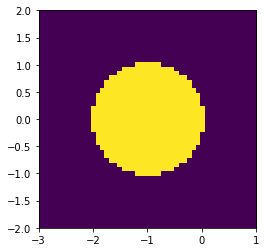

In [29]:
# Проведем численный эксперимент по определению области устойчивости.
# Мы реализуем наивный вариант, не требующий составления матрицы I.
def check_stability(ax=-3, bx=1, ay=-2, by=2, N=100, delta=1e-2, integrator=None, M=50, threshold=100):
    """Строит область устойчивости метода `integrator`, перебирая точки alpha=x+i y,
    и делая N итераций с шагом delta для уравнения y'=alpha y с начальными условиями y(0)=1.
    Результат итераций, изображенный на тепловой карте, ограничен для малых значений из области устойчивости 
    и велик вне этой области.
    Значений x берутся из интервала [ax,bx], а y из интервала [ay,by], причем для каждого выбирается M значений.
    """
    xk = np.linspace(ax, bx, M)
    yk = np.linspace(ay, by, M)
    v = np.empty((M,M))
    for nx in range(M):
        for ny in range(M):
            alpha = xk[nx]+1j*yk[ny]
            v[nx, ny] = np.abs( integrate(N, 1, lambda y: alpha*y, 1, integrator=integrator) )
    plt.imshow(v.T<threshold, origin='lower', extent=(ax, bx, ay, by))
    plt.show()

check_stability(integrator=EulerIntegrator)

# Задание

5. Постройте графики изменения со временем относительной ошибки численного решения уравнения $y'(t)=-5y(t)$ неявным методом Эйлера и методом Рунге-Кутты четвертого порядка.

6. Напишите асимптотику ошибки от номера итерации $N$ и от величины шага $\delta$. Каким образом в этой асимптотике отражается устойчивость метода и его порядок?

7. Найдите шаги, при которых рассмотренные выше методы устойчивы (хотя бы для одного метода). Постройте графики ошибок для нескольких разных шагов рядом с границей устойчивости. 

8. Объясните, почему неявный метод Эйлера более устойчив, чем явный?

9. Решите численно на интервале $t\in[0,1]$ уравнение
$$y'(t)=cos(y(t)),\quad y(0)=1.$$
Обоснуйте выбор метода интегрирования и шага интегрирования.
Сравните численное решение с аналитическим.

## Task 5

##### Постройте графики изменения со временем относительной ошибки численного решения уравнения  𝑦′(𝑡)=−5𝑦(𝑡) неявным методом Эйлера и методом Рунге-Кутты четвертого порядка.


In [30]:
def relative_error_plot(f, y, integrator, T=3):
    step = 1e-3
    y_0 = y(0)
    time, y_approx = solve_ode(T, step, f, y(0), integrator)
    y_precise = [y(t) for t in time]
    rel_error = [np.abs(y_precise[i] - y_approx[i]) / abs(y_precise[i]) for i in range(len(y_precise))]
    plt.loglog(time, rel_error, '.-')
    plt.xlabel("Время")
    plt.ylabel("Относительная ошибка со временем")

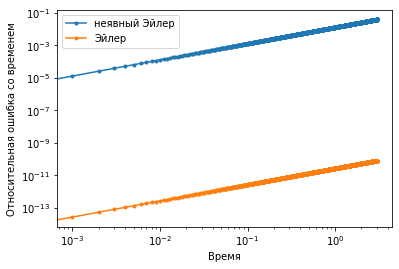

In [31]:
alpha = -5
yExact = lambda t: np.exp(alpha * t) # точное решение
f = (lambda y: alpha * y, lambda y: alpha) # функция и ее производная

relative_error_plot(f, yExact, BackwardEulerIntegrator)
relative_error_plot(f[0], yExact, RungeKuttaIntegrator)
plt.legend([u"неявный Эйлер",u"Эйлер",u"Рунге-Кутта"],loc=2)
plt.show()

## Task 6

##### Напишите асимптотику ошибки от номера итерации 𝑁 и от величины шага  𝛿. Каким образом в этой асимптотике отражается устойчивость метода и его порядок?

Связь ошибки на $(k+1)$-ом шаге с ошибкой на $k$-ом шаге выражается следующим образом

$$\Delta y_{k+1} = \beta \Delta y_k + C \cdot \delta^{D+1}$$

Отсюда можно получить связь ошибки на $(k+1)$-ом шаге с начальной ошибкой

$$\Delta y_{k+1} = \beta^{k+1} \Delta y_0 + C \cdot \delta^{D+1} \sum\limits_{i=1}^k \beta^i = \beta^{k+1} \Delta y_0 + C \cdot \delta^{D+1} \cdot \frac{\beta(\beta^k - 1)}{\beta - 1}$$

In [32]:
def abs_error_plot(f, y, integrator, T=1):
    eps=np.finfo(float).eps
    step = 1e-3
    y_0 = y(0)
    time, y_approx = solve_ode(T, step, f, y(0), integrator)
    y_precise = [y(t) for t in time]
    abs_error = [max(np.abs(y_precise[i] - y_approx[i]), eps) for i in range(len(y_precise))]
    plt.loglog(time, abs_error, '.-')
    plt.xlabel("Время")
    plt.ylabel("Абсолютная ошибка со временем")

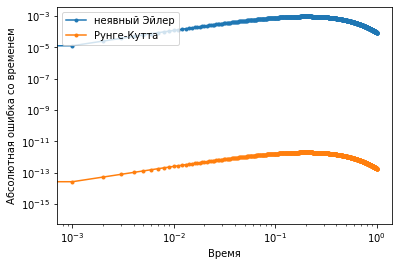

In [33]:
abs_error_plot(f, yExact, BackwardEulerIntegrator)
abs_error_plot(f[0], yExact, RungeKuttaIntegrator)
plt.legend([u"неявный Эйлер",u"Рунге-Кутта"],loc=2)
plt.show()

Выше мы рассматривали ОДУ на неизвестную скалярную функцию $y\colon\mathbb R\to\mathbb R$.
На практике часто возникают системы дифференциальных уравнений
$Y'(t)=F(Y(t))$, где $Y\colon\mathbb R\to\mathbb R^K$ векторнозначная функция скалярного аргумента $t$.
Считая, что $\mathbb R$ является частным случаем Гильбертова пространства, все рассуждения выше можно перенести на случай
вектор-функции практически без изменений.
Это очень удобно при отладке, так как вы можете сначала реализовать и отладить численный метод для на скалярной функии,
а затем использовать его для тензорных полей без изменений.
В качестве примера решим систему уравнений:
$$\begin{cases} \dot x = -y,\\ \dot y = x, \end{cases},\quad
\begin{cases} x(0) = 1,\\ y(0) = 0, \end{cases}.$$
Легко видеть, что аналитическое решение в данном случае имеет вид:
$$x(t)=\cos t,\quad y(t)=\sin t.$$
Используем выше реализованный интегратор Рунге-Кутты,
применив его в вектор функции:
$$Y(t)=\begin{pmatrix}x(t)\\y(t)\end{pmatrix},\quad
Y(0)=\begin{pmatrix}1\\0\end{pmatrix},\quad
Y'=\begin{pmatrix}0&-1\\1&0\end{pmatrix}Y.$$

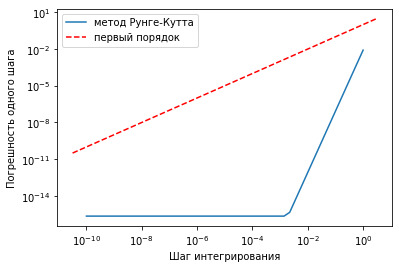

In [34]:
def f(y): return np.array([-y[1], y[0]])
def yExact(t): return np.array([np.cos(t), np.sin(t)])

oneStepErrorPlot(f, yExact, RungeKuttaIntegrator)
firstOrderPlot()
plt.legend([u"метод Рунге-Кутта",u"первый порядок"],loc=2)
plt.show()

Уравнения высокого порядка также могуть быть решены вышеописанными интеграторами без каких бы то ни было модификаций,
для чего достаточно свести уравнение к системе уравнений первого порядка, расматривая каждую производную как отдельную неизвестную.

# Task 8

Рассмотрим на примере уравнения

$$
y' = - k y(t)
$$

Тогда разностная схема для явного метода Ньютона имеет вид

$$
\frac{u^{n+1} - u^n}{h} = f (t^n, u^n) = - k u^n
$$

Исследуем устойчивость с помощью спеткрального метода

$$
\frac{\lambda^{n+1} - \lambda^n}{h} = - k \lambda^n \Longrightarrow
\lambda = 1 - k h
$$

Решение устойчиво при $|1 - k h| \leq 1 \quad \Longrightarrow \quad h \leq 2/k$

---

Для неявного метода Ньютона разностная схема имеет вид

$$
\frac{u^{n+1} - u^n}{h} = f (t^{n+1}, u^{n+1}) = -h u^{n+1}
$$

Тогда

$$
\frac{\lambda^{n+1} - \lambda^n}{h} = -k \lambda^{n+1} \Longrightarrow
\lambda - 1 = -k h \lambda \Longrightarrow \lambda = \frac{1}{1 + kh}
$$

Сходимость гарантируется при любом $h$

# Task 9

$$
y' (t) = \cos (y (t)), \quad y(0) = 1, \quad t \in [0, 1]
$$

/home/mark/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


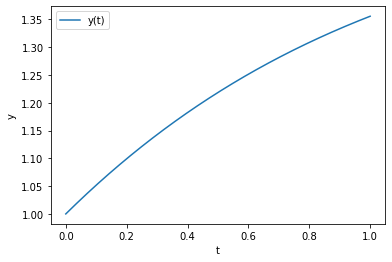

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

def f(y):
    return np.cos(y)

def g(x):
        return x - y[i-1] - h*f(x)

y0 = 1 
h = 0.0001 
t = np.arange(0, 1, h) 

y = np.zeros_like(t)
y[0] = y0

for i in range(1, len(t)):
    y[i] = fsolve(g, y[i-1])

plt.plot(t, y, label='y(t)')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

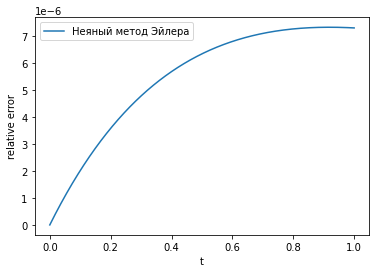

In [36]:
#график ошибки 
y_exact = 2*np.arccos((np.sinh(t)*(np.sin(1/2) - np.cos(1/2)) + np.cosh(t)*(np.cos(1/2) - np.sin(1/2)) + np.sin(1/2) + np.cos(1/2))/(np.sqrt(2)*np.sqrt((np.sin(1) - 1)*np.sinh(2*t) - (np.sin(1) - 1)*np.cosh(2*t) + 1 + np.sin(1))))  
error = np.abs(y_exact - y) / np.abs(y_exact)

plt.xlabel('t')
plt.ylabel('relative error')
plt.plot(t, error, label='Неяный метод Эйлера')
plt.legend()

# Задания 


10. Решите уравнение
$$y''(t)=-y(t),\quad y(0)=1,\quad y'(0)=0.$$
Это уравнение можно свести к системе уравнений первого порядка, с помощью введения новой переменной $z(t)=y'(t)$:
$$\begin{cases}
z'(t)=-y(t),\quad z(0)=0,\\
y'(t)=z(t),\quad y(0)=1.\\
\end{cases}$$
Тогда для решения этой системы можно использовать рассмотренные выше методы, если учесть, что искомое решение будет задаваться вектором:
$$Y(t)=\begin{pmatrix}y(t)\\z(t)\end{pmatrix}.$$

11. Изучите погрешности каждой из компонент решения $y(t)$, $z(t)$. 
Объясните, почему скорость сходимости ошибки к нулю (а значит и порядок метода) при стремлении шага к нулю
разный для разных компонент?

# Task 10 - 11

/home/mark/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


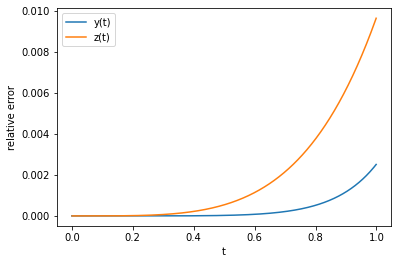

In [38]:
def f(y): return np.array([y[1], -y[0]])
def yExact(t): return np.array([np.cos(t), -np.sin(t)])

T = 1
h = 0.001
N = int(T/h)
t = np.arange(0, T, h)


y1=[RungeKuttaIntegrator(i,yExact(0),f) for i in t]

yy = np.zeros(len(t))
for i in range(len(t)):
  yy[i] = y1[i][0]
zz = np.zeros(len(t))
for i in range(len(t)):
  zz[i] = y1[i][1]

rerrory = np.abs(yExact(t)[0]- yy)/np.abs(yExact(t)[0])
rerrorz = np.abs(yExact(t)[1]- zz)/np.abs(yExact(t)[1])
plt.plot(t, rerrory, t, rerrorz)
plt.xlabel(u"t")
plt.ylabel(u"relative error") 
plt.legend([u"y(t)",u"z(t)"],loc=2)
plt.show()

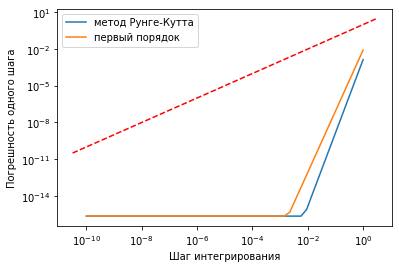

In [39]:
from numpy.ma.core import zeros
def oneStepErrorPlot(f, y, integrator):
    """Рисует график зависимости погрешности одного шага
    интегрирования от длины шага.
    f(y) - правая часть дифференциального уравнения,
    y(t) - точное решение,
    integrator(h,y0,f) - аргументы аналогичны EulerIntegrator.
    """
    eps=np.finfo(float).eps
    steps=np.logspace(-10,-0,50) # шаги интегрирования
    y0=y(0) # начальное значение
    yPrecise=[y(t) for t in steps] # точные значения решения
    yApproximate=[integrator(t,y0,f) for t in steps] # приближенные решения

    yy = np.zeros(len(steps))
    for i in range(len(steps)):
      yy[i] = yApproximate[i][0]
    zz = np.zeros(len(steps))
    for i in range(len(steps)):
      zz[i] = yApproximate[i][1]
    
    ye = np.zeros(len(steps))
    for i in range(len(steps)):
      ye[i] = yPrecise[i][0]
    ze = np.zeros(len(steps))
    for i in range(len(steps)):
      ze[i] = yPrecise[i][1]

    h1=[np.maximum(np.max(np.abs(yp-ya)),eps) for yp, ya in zip(ye, yy)]
    h2 = [np.maximum(np.max(np.abs(yp-ya)),eps) for yp, ya in zip(ze, zz)]
    plt.loglog(steps, h1, '-')
    plt.loglog(steps, h2, '-')
    plt.xlabel(u"Шаг интегрирования")
    plt.ylabel(u"Погрешность одного шага") 


def f(y): return np.array([y[1], -y[0]])
def yExact(t): return np.array([np.cos(t), -np.sin(t)])

oneStepErrorPlot(f, yExact, RungeKuttaIntegrator)
firstOrderPlot()
plt.legend([u"метод Рунге-Кутта",u"первый порядок"],loc=2)
plt.show()

Выше мы вычисляли погрешность решения, сравнивая численное решение с аналитическим.
На практике естественно мы не имеем аналитического решения, 
поэтому погрешность решения удобно оценивать по двум приближенным решениям,
имеющим разные порядки точности.
Пусть у нас есть два приближения $y_1$ и $y_2$ одного аналитического решения $y$,
имеющие порядок $D$ и $D+1$, т.е.
$$y_1=y+C\cdot\delta^D+O(\delta^{D+1}),\quad y_2=y+O(\delta^{D+1}),$$
тогда разность этих решений с точностью до бесконечно малых совпадает с главным вкладом в ошибку для решения с большей погрешностью,
$$y_1-y_2=C\cdot \delta^D+O(\delta^{D+1}),$$
следовательно эта разность может быть использована для оценки погрешности.
Более того, отбрасывая бесконечно малые высоких порядков, мы можем оценить величину шага, достаточную для получения заданной точности $\epsilon$:
$$|y_1-y_2|\approx C\delta^D<\epsilon\quad\Leftrightarrow\quad
\delta<\left(\frac{|y_1-y_2|}{C}\right)^{1/D}.$$
Такая оценка точности будет автоматически подстраиваться под свойства решения возле текущего момента времени, позволяя делать большие шаги, когда это возможно.
Получаемые значения шага необходимо ограничить как снизу, чтобы избежать больших численных погрешностей, так и сверху, чтобы не выйти из области устойчивости.
В оценке шага выше присутствует константа $C$, которая на практике не известна, но которую иногда можно разумно оценить.
Вместо явного вычисления шага через $y_2-y_1$ можно увеличивать или уменьшать шаг при пересечением ошибкой некой верхней или нижней границы. 

Вычисление двух решений двумя разными методами представляется слишком дорогой ценой для контроля точности,
однако существует способ значительно снизить стоимость расчета вторым методом, переиспользуя результаты первого метода.
Например, рассмотрим метод [Рунге-Кутты-Фелберга](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta%E2%80%93Fehlberg_method).
Для задания коэффициентов методов Ругне-Кутты высокого порядка удобно воспользоваться таблицей Батчера:

$$\begin{array}{c|ccccc} 
0 \\
c_2 & a_{21} \\
c_3 & a_{31} & a_{32}\\
\vdots & \vdots & & \ddots \\
c_D & a_{D1} & a_{D2} & \cdots & a_{D,D-1}\\\hline
& b_1 & b_2 & \cdots & b_{D-1} & b_D
\end{array}
$$    

Значение функции $y_{k+1}$ на $k+1$ шаге находися через решение $y_k$ на $k$-ом шаге по формуле:
$$y_{k+1} = y_k + \delta \sum_{i=1}^D b_i k_i,$$
где значения $k_i$ суть значения правой части ОДУ в промежуточных точках
$$k_i=f\left(y_n+\delta\sum_{j=1}^{i-1}a_{i,j}k_j\right).$$

Таблица Батчера для метода Рунге-Кутты-Фелберга имеет вид:
$$    
\begin{array}{c|ccccc} 
0 \\
1/4 & 1/4 \\
3/8 & 3/32 & 9/32 \\
12/13 & 1932/2197 & −7200/2197 & 7296/2197 \\
1 & 439/216 & −8 & 3680/513 & -845/4104 \\
1/2 & −8/27 & 2 & −3544/2565 & 1859/4104 & −11/40 \\\hline
& 16/135 & 0 & 6656/12825 & 28561/56430 & −9/50 & 2/55 \\
& 25/216 & 0 & 1408/2565 & 2197/4104 & −1/5 & 0 \\
\end{array}
$$    
Заметим, что таблица имеет две строки для коэффициентов $b_i$: первая строка определяет решение $y_1$ (метод 5-го порядка),
а вторая строка решение $y_1$ (метод 4-го порядка).
При этом значения $k_i$ для обоих методом совпадают, что увеличивает стоимость стандартного метода Рунге-Кутты 4-го порядка
только на два вычисления правой части ОДУ.

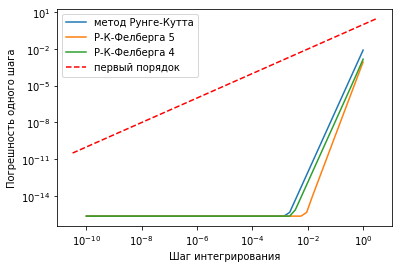

In [61]:
# Реализуем универсальный метод Рунге-Кутты, задаваемый таблицей Батчера, передаваемой в виде трех массивов a, b, c.
# Массивы имеют следующий вид 
# c = [c_2, c_3, c_4,...]
# a = [[a_21], [a_21, a_22], [a_31, a_32, a_33], ... ]
# b = [ [b_1, b_2, ...], альтернативный набор b_i при необходимости ]
def ExpliciteRungeKutta(delta, y0, f, a=None, b=None, c=None):
    D = len(c) # Порядок метода
    k = [f(y0)] # Производные  в промежуточных точках.
    for i in range(D):
        x = 0 # Здесь накапливается промежуточный сдвиг.
        for j in range(i+1):
            x = x + a[i][j]*k[j]
        k.append( f(y0+delta*x) )
    B = len(b) # Число разных методов в рамках одной таблицы.
    y1 = np.empty((B,)+y0.shape) # Решения разными методами.
    for p in range(B):
        x = 0 
        for n in range(D+1):
            x = x + b[p][n]*k[n]
        y1[p] = y0+delta*x
    return y1

# Стандартный метод Рунге-Кутты.
def RK4(delta, y0, f):
    return ExpliciteRungeKutta(delta, y0, f, 
                               a=[[0.5],
                                  [0, 0.5],
                                  [0,0,1]
                                 ],
                               b=[[1/6,1/3,1/3,1/6]],
                               c=[0.5,0.5,1]
                              )[0]

# Метод Рунге-Кутты-Фелберга.
def RKF(delta, y0, f):
    return ExpliciteRungeKutta(delta, y0, f, 
                               a=[[1/4],
                                  [3/32, 9/32],
                                  [1932/2197, -7200/2197, 7296/2197],
                                  [439/216, -8, 3680/513, -845/4104],
                                  [-8/27, 2, -3544/2565, 1859/4104, -11/40]
                                 ],
                               b = [[16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55],
                                    [25/216,0, 1408/2565, 2197/4104, -1/5, 0]
                                   ],
                               c=[1/4, 3/8, 12/13, 1, 1/2]
                              )


def f(y): return np.array([-y[1], y[0]])
def yExact(t): return np.array([np.cos(t), np.sin(t)])

oneStepErrorPlot(f, yExact, RK4)
oneStepErrorPlot(f, yExact, lambda *vargs: RKF(*vargs)[0])
oneStepErrorPlot(f, yExact, lambda *vargs: RKF(*vargs)[1])
firstOrderPlot()
plt.legend([u"метод Рунге-Кутта",u"Р-К-Фелберга 5",u"Р-К-Фелберга 4",u"первый порядок"],loc=2)
plt.show()

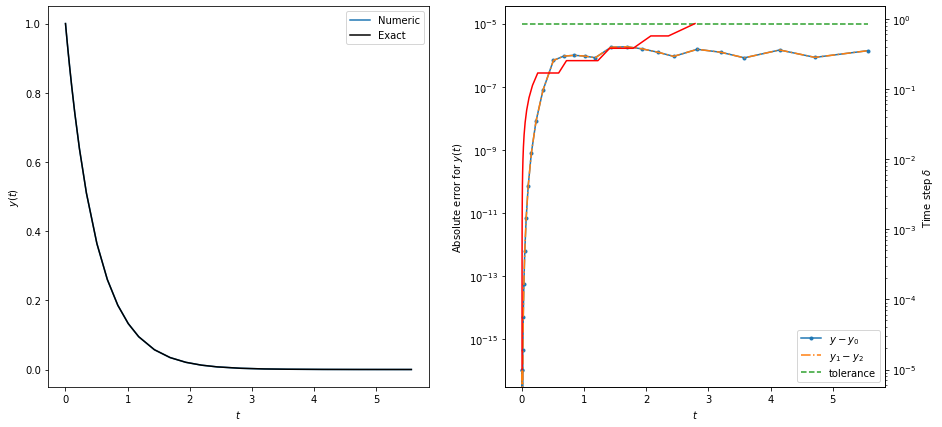

In [62]:
# Решатель ОДУ с адаптивным шагом.
def solve_ode_adaptive(T=None, f=None, y0=None, integrator=None, tolerance=None):
    """
    Решает уравнение y'(t)=f(y(t)) с начальными условиями y(0)=y0 на интервале [0,T],
    используя интегратор `integrator` и шаг интегрирования delta.
    Возвращает пару массивов (tk, yk), где tk хранит отсчеты времени, а yk значения решения в эти отсчеты.
    """
    y0 = np.asarray(y0)
    tk = [0.]
    yk = [y0] # Массивы для хранения решения.
    errors = [0.] # Оценка ошибки
    delta = 1e-5
    while tk[-1]<T:
        y1, y2 = integrator(delta, yk[-1], f)
        err = np.linalg.norm(y2-y1)
        if err>tolerance:
            delta /= 2
            continue
        tk.append(tk[-1]+delta)
        yk.append(y1)         
        errors.append(err)
        if err<0.1*tolerance:
            delta *= 1.5
    return np.array(tk), np.array(yk), np.array(errors)

def run_test_adaptive(integrator=None, yExact=None, tolerance=None, **problem):
    # Готовим место под рисунки
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))

    # Проводим эксперименты.
    tk, yk, err = solve_ode_adaptive(integrator=integrator, tolerance=tolerance, **problem) 
    y0 = yExact(tk)
    error = np.abs(yk-y0)
    ax1.plot(tk, np.real(yk), '-', label='Numeric')
    ax1.plot(tk, np.real(y0), '-k', label='Exact')
    ax2.semilogy(tk, error, '.-', label='$y-y_0$')
    ax2.semilogy(tk, error, '-.', label='$y_1-y_2$')    
    ax2.semilogy(tk, tk*0+tolerance, '--', label="tolerance")
    ax3 = ax2.twinx()
    ax3.semilogy((tk[1:]+tk[:1])/2, np.diff(tk), '-r', label='dt')
    ax1.legend(); ax2.legend()
    ax1.set_xlabel("$t$")
    ax1.set_ylabel("$y(t)$")    
    ax2.set_xlabel("$t$")
    ax2.set_ylabel("Absolute error for $y(t)$")
    ax3.set_ylabel("Time step $\delta$")    
    plt.show()

alpha = -2 # Коэффициент в решаемом уравнении y'(t)=alpha*y(t).
problem = {
    "T": 5, # Промежуток интегрирования
    "f": lambda y: alpha*y, 
    "yExact": lambda t: np.exp(alpha*t),
    "y0": 1, # Начальное условие.
}

run_test_adaptive(integrator=RKF, tolerance=1e-5, **problem)

# Задания.

12. Численно промоделируйте гравитационное взаимодействие двух тел, используя метод Рунге-Кутты-Фелберга.
В качестве оценки точности решения используйте полную энергию систем, полный импульс или другие сохраняющиеся величины.
Нарисуйте траектории тел, являются ли орбиты устойчивыми?
Покажите изменение ошибки со временем.
Изучите, как шаг интегрирования меняется при увеличении скорости тел.

13. (повышенная сложность) Предложите метод численного моделирования столкновение двух материальных точек. 
Как вы обойдете тот факт, что в момент столкновения силы будут бесконечны?
Выполняются ли законы сохранения в вашей модели?

# Task 12

$$
\begin{cases}
\dot{\vec{x}}_1 = \vec{v}_1\\
\dot{\vec{x}}_2 = \vec{v}_2\\
\dot{\vec{v}}_1 = Gm_2\frac{\vec{r_2} - \vec{r_1}}{r^3}\\
\dot{\vec{v}}_2 = Gm_1\frac{\vec{r_1} - \vec{r_2}}{r^3}\\
\end{cases}
$$

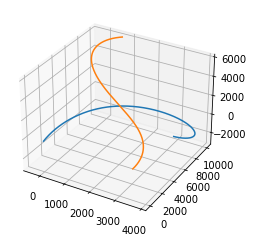

In [45]:
G = 6.67259e-11

t = np.arange(0, 200, 0.1)
m1 = 3e16
r10 = np.array([0, 0, 0])  
v10 = np.array([0, 50, 15])  
#v10 = np.array([50, 0, 0]) 

m2 = 3e16
r20 = np.array([3500, 0, 0])  
v20 = np.array([0, 50, 0])  

y0 = np.array([r10, r20, v10, v20])


def f(y): return np.array([y[2],y[3], G*m2*(y[1]-y[0])/(np.linalg.norm(y[1]-y[0]))**3, G*m1*(-y[1]+y[0])/(np.linalg.norm(y[1]-y[0]))**3])

y1=[RungeKuttaIntegrator(i,y0,f) for i in t]
r1 = np.zeros((len(t),3))
for i in range(len(t)):
  r1[i] = y1[i][0]
r2 = np.zeros((len(t),3))
for i in range(len(t)):
  r2[i] = y1[i][1]
v1 = np.zeros((len(t),3))
for i in range(len(t)):
  v1[i] = y1[i][2]
v2 = np.zeros((len(t),3))
for i in range(len(t)):
  v2[i] = y1[i][3]

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

xx1 = np.zeros(len(t))
yy1 = np.zeros(len(t))
zz1 = np.zeros(len(t))
xx2 = np.zeros(len(t))
yy2 = np.zeros(len(t))
zz2 = np.zeros(len(t))
vx1 = np.zeros(len(t))
vy1 = np.zeros(len(t))
vz1 = np.zeros(len(t))
vx2 = np.zeros(len(t))
vy2 = np.zeros(len(t))
vz2 = np.zeros(len(t))

for i in range(len(t)):
  xx1[i] = r1[i][0]
  yy1[i] = r1[i][1]
  zz1[i] = r1[i][2]
for i in range(len(t)):
  xx2[i] = r2[i][0]
  yy2[i] = r2[i][1]
  zz2[i] = r2[i][2]
for i in range(len(t)):
  vx1[i] = v1[i][0]
  vy1[i] = v1[i][1]
  vz1[i] = v1[i][2]
for i in range(len(t)):
  vx2[i] = v2[i][0]
  vy2[i] = v2[i][1]
  vz2[i] = v2[i][2]

ax.plot(xx1, yy1, zz1 )
ax.plot(xx2, yy2, zz2 )
plt.show()

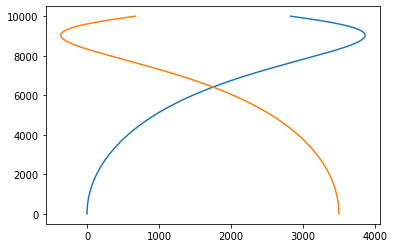

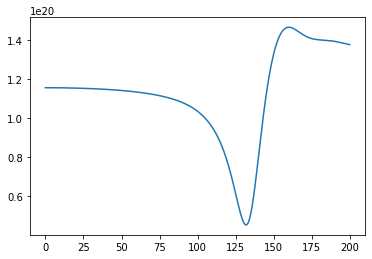

Рассмотренные выше методы Рунге-Кутты вычисляют значение правой части ОДУ в нескольких промежуточных точках, чтобы апроксимировать решение ОДУ многочленом, 
который затем вычислется на следующем отсчете времени.
Значения в промежуточных точках отбрасываются и не используются на следующих шагах, что представляется не слишком рациональным.
[Метод Адамса](https://en.wikipedia.org/wiki/Linear_multistep_method) и сходные методы устраняют этот недостаток.
В основе метода лежит преобразование дифференциального уравнения $y'(t)=f(t;y(t))$ с начальными условиями $y(0)=y_0$ в эквивалентное интегральное уравнение:
$$y(t)=\int_0^t f(\tau, y(\tau))d\tau+y_0,$$
с последующей заменой интеграла на какую-либо квадратурную формулу, что приводит нас к рекуррентной формуле: 
$$y_{k}=y_{k-D}+\delta\sum_{j=0}^{D} u_{j} f(t_{k-j}, y_{k-j}),$$
где мы использовали равномерную решетку для отсчетов времени $t_k$ с шагом $\delta$ и обозначили значения решения на этих отсчетах через $y_k=y(t_k)$.
При использовании квадратурных формул для замкнутого интеграла коэффициент $u_0\neq 0$, а значит значение $u_k$ нужно находить из решения уравнение, 
т.е. мы получаем неявный метод.
Для простоты расмотрим квадратурную формулу для открытого интервала, что приведет нас явной схеме.
Воспользуемся [формулой Ньютона-Котеса](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas) четвертого порядка для открытого интервала:
$$
\int_a^b f(t)dt = \frac{4\delta}{3}(2f(a+\delta)-f(a+2\delta)+2f(a+3\delta))+O(\delta^5),\quad\delta=\frac{b-a}{4}.
$$
Заменяя интеграл в интегральном уравнении по указнной формуле, получаем искомый интегратор:
$$
y_k=\frac{4\delta}{3}(2f(t_{k-1},y_{k-1})-f(t_{k-2},y_{k-2})+2f(t_{k-3},y_{k-3}))+y_{k-4}.
$$
Эта формула использует четыре предыдущих значения функции, однако начальное условие задает только одно значение $y_0$.
Для нахождения точек $y_1$, $y_2$, $y_3$ необходимо использовать какой-либо другой метод, например, метод Рунге-Кутты.

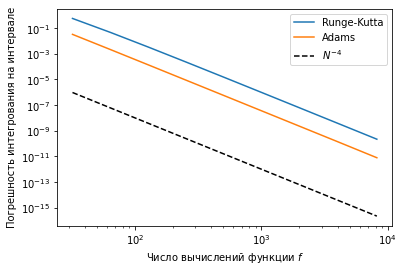

In [63]:
# Сравним точность метода Рунге-Кутты и метода Адомса четвертого порядка.
# Будем подбирать шаги в обоих методах таким образом, чтобы общее число вычислений правой часто ОДУ было равным для обоих методов.

alpha = 5 # Собственное число диф. оператора.
f = lambda y: alpha*y #  # Правая часть ОДУ.
y0 = 1 # Начальное условие.
y = lambda t: y0*np.exp(alpha*t) # Аналитическое решение.
T = 1 # Максимальное значение времени.
yT = y(T) # Точное значение ответа.

Ns = 2**np.arange(5,14) # Число вычислений f.
delta_RK = np.empty(Ns.shape) # Шаги для РК для каждого N/
delta_A = np.empty(Ns.shape) # Шаги для Адамса.
err_RK = np.empty(Ns.shape) # Ошибка метода РК для данного N.
err_A = np.empty(Ns.shape) # Ошибка метода Адамса для данного N.

for n, N in enumerate(Ns):
    # Сначала считаем по РК
    K = N//4 # Число шаго по РК
    delta = delta_RK[n] = T/K # Шаг интегрирования
    yk = y0
    for k in range(K): # Делаем шаги по РК
        yk = RungeKuttaIntegrator(delta, yk, f)
    err_RK[n] = np.abs(yT-yk)
    
    # Теперь считаем по Адамсу.
    delta = delta_A[n] = T/N
    yk0 = y0
    # Первые несколько точек считаем по РК (не учитываем увеличение числа операций, так как 3*3<<N).
    yk1 = RungeKuttaIntegrator(delta, yk0, f)
    yk2 = RungeKuttaIntegrator(delta, yk1, f)
    yk3 = RungeKuttaIntegrator(delta, yk2, f)
    # Сохраняем производные в 4 точках.
    fk0, fk1, fk2, fk3 = f(yk0), f(yk1), f(yk2), f(yk3)
    for k in range(3, N): # Делаем шаги
        yk4 = yk0+4*delta/3*(2*fk1-fk2+2*fk3) # Новая точка
        fk4 = f(yk4) # Новая производная
        # Перенумеруем точки.
        yk0, yk1, yk2, yk3 = yk1, yk2, yk3, yk4
        fk0, fk1, fk2, fk3 = fk1, fk2, fk3, fk4        
    err_A[n] = np.abs(yT-yk4)
    
# Строим графики ошибок 
plt.loglog(Ns, err_RK, '-', label="Runge-Kutta")
plt.loglog(Ns, err_A, '-', label="Adams")
plt.loglog(Ns, Ns**(-4.), '--k', label="$N^{-4}$")
plt.xlabel("Число вычислений функции $f$")
plt.ylabel("Погрешность интегрования на интервале")
plt.legend()
plt.show()

# Оба метода имеют четвертый порядок, но Адамс дает заметно более точное решение при том же объемы вычислений, что и РК.

Выше мы были вынуждены выводить новые формулы, чтобы получить метод нового порядка.
Для методов высокого порядка формулы достаточно громоздкие, в них легко ошибиться.
Существует однако ряд методов, которые позволяют получать решения высокого порядка, вызывая несколько раз решатели низкого порядка.
Рассмотрим, например, метод экстраполяции (отложенной коррекции), см. подробнее и практически полезную реализацию в главе 
17.3 Richardson Extrapolation and the Bulirsch-Stoer Method книги [Numerical Recipes](http://numerical.recipes/).
В основе метода лежит следующее соображение.
Пусть у нас имеется некий способ вычислять $y(T)$ по приближенной формуле 
$y(T)\approx S(\delta)$ методом порядка $D$, здесь мы опустили зависимость от $y_0$, $T$, $f$, 
которые считаются постоянными, варьируется только шаг интегрирования $\delta$.
В силу выбора порядка метода должно выполняться:
$$y(T)=S(\delta)+C\delta^D +O(\delta^{D+1}),\quad \delta\to 0.$$
При $\delta=0$ значение $S$ должно дать точный ответ $y(T)=S(0)$, 
однако практически взять нулевой шаг нельзя, так как в этом случае число шагов бесконечно.
Вместо этого, мы попробуем исключить старший вклад в ошибку, имея значение $S$ для разных $\delta$:
$$
2^D S(\delta)-S(2\delta)=(2^D-1)y(T)+O(\delta^{D+1}),
$$
откуда можно выразить $y(T)$ с порядком ошибки на единицу больше, чем для метода $S$.
Нам удалось повысить порядок метода на $\mu$, не прилагая больших усилий.

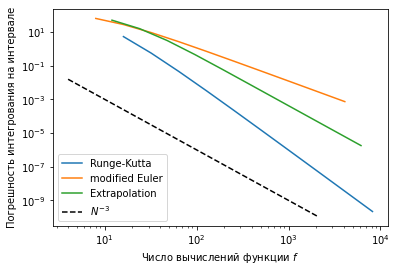

In [64]:
# Попробуем увеличить порядок модифицированного метода Эйлера, используя экстраполяцию по шагу.
from numpy.polynomial import polynomial as P

alpha = 5 # Собственное число диф. оператора.
f = lambda y: alpha*y #  # Правая часть ОДУ.
y0 = 1 # Начальное условие.
y = lambda t: y0*np.exp(alpha*t) # Аналитическое решение.
T = 1 # Максимальное значение времени.
yT = y(T) # Точное значение ответа.

aux_integrator = ModifiedEulerIntegrator # Вспомогательный интегратор
D = 2 # Порядок вспомогательного метода

Ns = 2**np.arange(2,12) # Число вычислений f.
err_RK = np.empty(Ns.shape) # Ошибка метода РК для данного N.
err_mE = np.empty(Ns.shape) # Ошибка метода модифицированного Эйлера для данного N.
err_Ext = np.empty(Ns.shape) # Ошибка метода экстраполяции для данного N.

for n, N in enumerate(Ns):
    # Сначала считаем по РК, увеличивая число шагов до самого большого в методе экстраполяции.
    yk = integrate(N, T/N, f, y0, RungeKuttaIntegrator)
    err_RK[n] = np.abs(yk-yT)
    # Теперь считаем по модифицированному Эйлеру для разных шагов.
    yk1 = integrate(N, T/N, f, y0, aux_integrator) # для плотной решетки
    yk2 = integrate(N//2, 2*T/N, f, y0, aux_integrator) # для в два раза более редкой решетки
    err_mE[n] = np.abs(yk1-yT) # Ошибка метода м-Эйлера на плотной решетке
    # Повышаем порядок точности
    yk = (2**D*yk1-yk2)/(2**D-1)
    err_Ext[n] = np.abs(yk-yT)
    
# Строим графики ошибок 
plt.loglog(Ns*4, err_RK, '-', label="Runge-Kutta")
plt.loglog(Ns*2, err_mE, '-', label="modified Euler")
plt.loglog(Ns*3, err_Ext, '-', label="Extrapolation")
plt.loglog(Ns, Ns**(-3.), '--k', label="$N^{-3}$")
plt.xlabel("Число вычислений функции $f$")
plt.ylabel("Погрешность интегрования на интервале")
plt.legend()
plt.show()

# Действительно, порядок метода повысился. 
# Порядок мог бы быть еще на единицу выше, если бы мы использовали в качестве aux_integrator метод,
# ошибка для которого была бы четной функцией delta.
# Мы могли бы исключить большее число старших членов ошибки, если бы вычислили S для большего набора шагов.
# Все вмести эти техники объединены в методе Bulirsch-Stoer'а.